## Uma Análise de Dados Sobre a Cobertura Vacinal Brasileiro

## 1 Introdução

## 2 Descrição dos Dados

"A fórmula de cálculo da cobertura é o número de doses aplicadas da dose indicada (1ª, 2ª, 3ª dose ou dose única, conforme a vacina) dividida pela população alvo, multiplicado por 100. Exemplo: para a Tetravalente (DTP/Hib), considera-se o número de terceiras doses aplicadas na faixa etária de menores de 1 ano. Para a vacina oral de rotavírus humano, pode-se avaliar cobertura de 1ª e 2ª doses.

Observações:

Em 2002, foi realizada a implantação da vacina tetravalente para substituir as vacinas DTP e Hib isoladas na faixa etária de menores de 1 ano. Devido à forma gradual de sua implantação e à necessidade da utilização das vacinas DTP e Hib isoladas até dezembro de 2002, é necessária a soma das vacinas para o cálculo da cobertura vacinal da seguinte forma: para difteria, tétano e coqueluche deve-se somar as terceiras doses da vacina DTP e da vacina tetravalente; contra o haemophilus influenzae, deve-se somar as terceiras doses das vacinas Hib e tetravalente.

Em 2003, a vacina contra sarampo em menores de 1 ano foi retirada do calendário vacinal, sendo substituída pela vacina tríplice viral (SCR - sarampo/caxumba/rubéola) para aplicação nas crianças de 1 ano de idade na rotina e menores de 5 anos em campanhas de seguimento.

Para cálculo de coberturas vacinais por tipo de doença, deve-se somar as doses (dose única ou 3ª dose) das vacinas com os referidos componentes. Exemplo: para a cobertura vacinal contra sarampo, deve-se somar as doses aplicadas (1ª dose) das vacinas tríplice viral, dupla viral e sarampo monovalente. No caso da cobertura vacinal contra a poliomielite, devem-se somar as 3ª doses da vacina oral e inativada." (Disponível em http://tabnet.datasus.gov.br/cgi/pni/%5Ccpnidescr.htm#origem)

## 3 Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime

## 4 Percetual de Cobertura Vacinal - Brasil

### 4.1 Carregamento dos Dados

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/diogoslz/Bootcamp-Alura-Modulo-2-Projeto/main/Dados/A220642189_28_143_208.csv",
                    encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=19,
                    thousands=".", decimal=",")
dados.head()

<ipython-input-2-fcb240a8fb73>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dados = pd.read_csv("https://raw.githubusercontent.com/diogoslz/Bootcamp-Alura-Modulo-2-Projeto/main/Dados/A220642189_28_143_208.csv",


,Unidade da Federação,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,11 Rondônia,42.76,50.80,76.05,83.33,93.26,82.31,79.59,83.70,78.18,...,92.75,85.82,76.72,98.18,111.27,63.77,80.74,82.45,51.44,79.88
1,12 Acre,20.53,46.61,36.59,67.56,66.38,85.61,66.79,76.77,81.66,...,84.74,74.35,58.87,59.29,75.54,46.91,62.18,67.44,45.44,69.26
2,13 Amazonas,20.15,35.82,49.88,72.01,70.62,72.19,70.91,70.68,70.98,...,80.09,79.18,67.06,77.14,94.95,48.27,65.33,69.82,49.97,69.65
3,14 Roraima,64.06,88.84,89.18,80.26,97.45,93.76,83.94,72.67,78.33,...,84.42,73.13,60.70,82.30,105.27,57.41,74.26,78.76,48.04,75.68
4,15 Pará,32.44,40.11,51.26,67.09,67.46,82.95,77.23,83.43,82.66,...,84.11,77.87,67.91,71.71,67.51,41.43,57.60,57.44,37.53,73.89


In [3]:
def RetornarRegiao(x):
    regiao = ''
    
    x = x[0]
    
    if (x == '1'): regiao = 'Norte'       
    elif (x == '2'): regiao = 'Nordeste'
    elif (x == '3'): regiao = 'Sudeste'
    elif (x == '4'): regiao = 'Sul'
    elif (x == '5'): regiao = 'Centro-Oeste'
    
    return regiao

In [4]:
dados.drop('Total',axis=1, inplace=True)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unidade da Federação  27 non-null     object 
 1   1994                  15 non-null     float64
 2   1995                  24 non-null     float64
 3   1996                  26 non-null     float64
 4   1997                  27 non-null     float64
 5   1998                  27 non-null     float64
 6   1999                  27 non-null     float64
 7   2000                  27 non-null     float64
 8   2001                  27 non-null     float64
 9   2002                  27 non-null     float64
 10  2003                  27 non-null     float64
 11  2004                  27 non-null     float64
 12  2005                  27 non-null     float64
 13  2006                  27 non-null     float64
 14  2007                  27 non-null     float64
 15  2008                  27 

In [6]:
dados = dados.set_index('Unidade da Federação')

In [7]:
dados.index

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [8]:
dados.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,42.76,50.80,76.05,83.33,93.26,82.31,79.59,83.70,78.18,72.30,...,79.26,92.75,85.82,76.72,98.18,111.27,63.77,80.74,82.45,51.44
12 Acre,20.53,46.61,36.59,67.56,66.38,85.61,66.79,76.77,81.66,77.54,...,76.32,84.74,74.35,58.87,59.29,75.54,46.91,62.18,67.44,45.44
13 Amazonas,20.15,35.82,49.88,72.01,70.62,72.19,70.91,70.68,70.98,64.77,...,73.30,80.09,79.18,67.06,77.14,94.95,48.27,65.33,69.82,49.97
14 Roraima,64.06,88.84,89.18,80.26,97.45,93.76,83.94,72.67,78.33,72.99,...,75.19,84.42,73.13,60.70,82.30,105.27,57.41,74.26,78.76,48.04
15 Pará,32.44,40.11,51.26,67.09,67.46,82.95,77.23,83.43,82.66,80.50,...,81.55,84.11,77.87,67.91,71.71,67.51,41.43,57.60,57.44,37.53


In [9]:
dados = dados.reset_index().melt(id_vars=["Unidade da Federação"], value_vars=dados.columns)
dados.columns = ["uf", "ano", "cobertura_vacinal"]

dados = dados.set_index('uf')

dados['Região'] = dados.index.map(RetornarRegiao)
dados.index = dados.index.str[3:] 

dados.head()

,ano,cobertura_vacinal,Região
uf,,,
Rondônia,1994,42.76,Norte
Acre,1994,20.53,Norte
Amazonas,1994,20.15,Norte
Roraima,1994,64.06,Norte
Pará,1994,32.44,Norte


### 4.2 Análise Gráfica

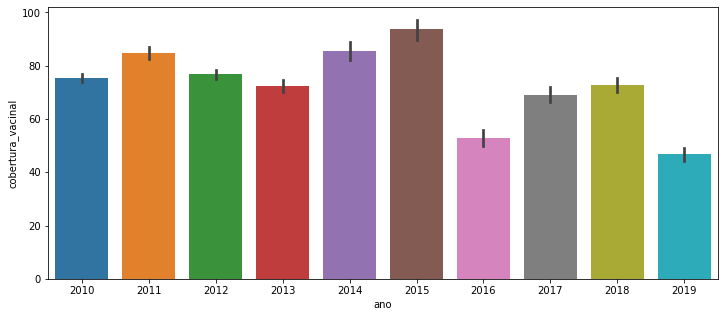

In [10]:
plt.figure(figsize=(12,5))
ax = sns.barplot(data=dados[dados.ano >= '2010'], x='ano', y="cobertura_vacinal")
plt.show()

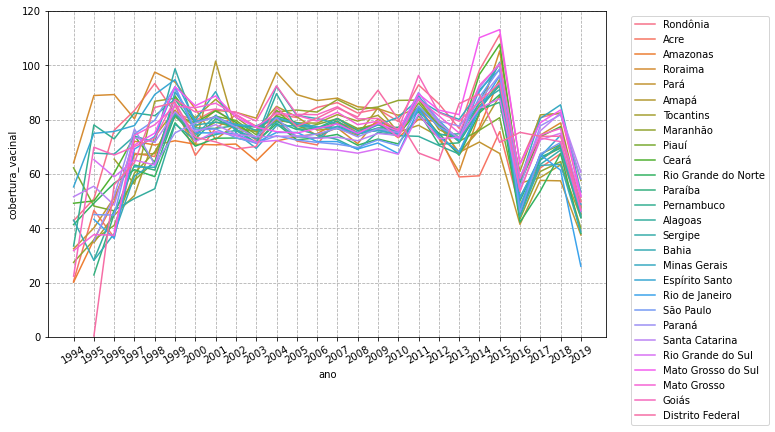

In [11]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=dados, x="ano", y="cobertura_vacinal", hue="uf")
ax.legend(bbox_to_anchor=(0.8, 0.5, 0.5, 0.5),)
plt.xticks(rotation=30)
plt.ylim(0, 120)
plt.grid(linestyle="--")
plt.show()

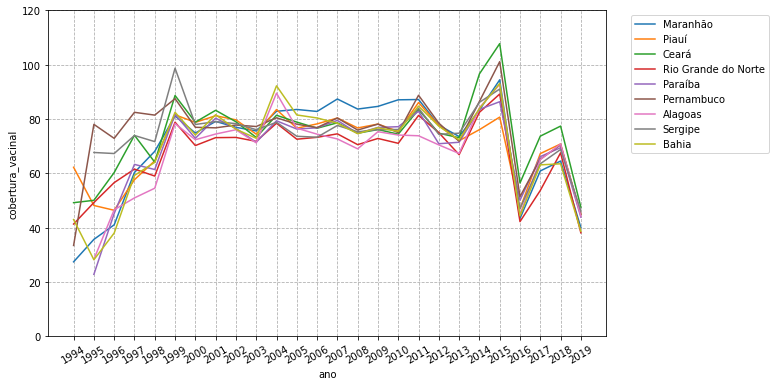

In [12]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=dados[dados['Região'] == 'Nordeste'], x="ano", y="cobertura_vacinal", hue="uf")
ax.legend(bbox_to_anchor=(0.8, 0.5, 0.5, 0.5),)
plt.xticks(rotation=30)
plt.ylim(0, 120)
plt.grid(linestyle="--")
plt.show()

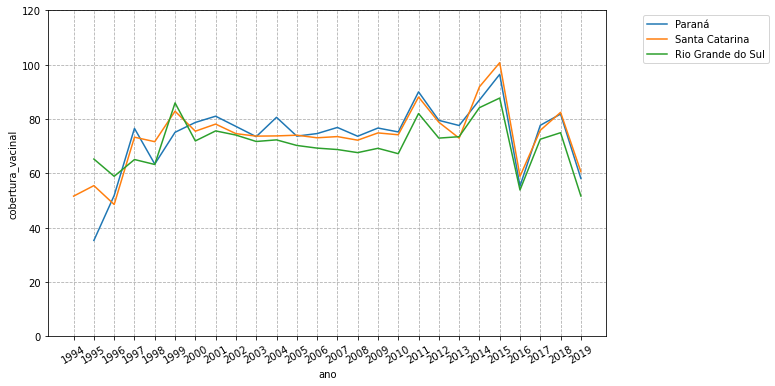

In [13]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=dados[dados['Região'] == 'Sul'], x="ano", y="cobertura_vacinal", hue="uf")
ax.legend(bbox_to_anchor=(0.8, 0.5, 0.5, 0.5),)
plt.xticks(rotation=30)
plt.ylim(0, 120)
plt.grid(linestyle="--")
plt.show()

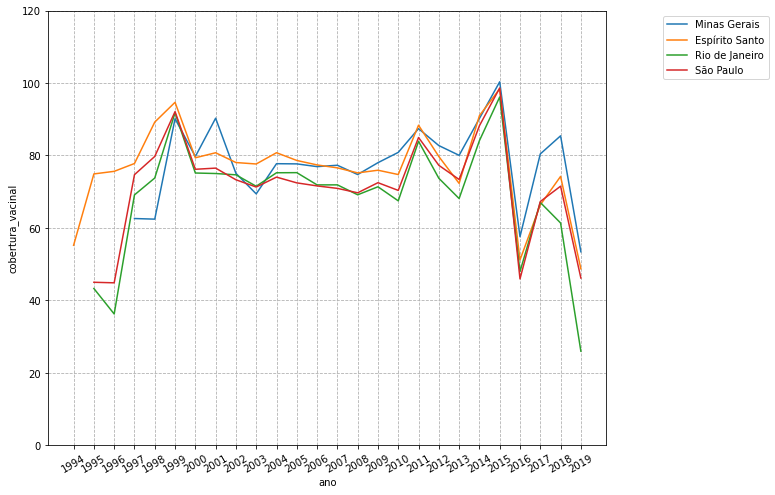

In [14]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(data=dados[dados['Região'] == 'Sudeste'], x="ano", y="cobertura_vacinal", hue="uf")
ax.legend(bbox_to_anchor=(0.8, 0.5, 0.5, 0.5),)
plt.xticks(rotation=30)
plt.ylim(0, 120)
plt.grid(linestyle="--")
plt.show()

In [15]:
dados[(dados.ano >= '2012') & (dados.ano <= '2015')].mean()

ano                        inf
cobertura_vacinal    82.074907
dtype: float64

In [16]:
dados[dados.ano >= '2016'].mean()

ano                        inf
cobertura_vacinal    60.319722
dtype: float64

In [17]:
media_cobertura = dados.groupby('ano').mean()

In [18]:
media_cobertura.columns = ['media_cobertura_vacial']

In [19]:
media_cobertura.head()

,media_cobertura_vacial
ano,
1994,39.834667
1995,47.170000
1996,53.954231
1997,68.150370
1998,72.541852


In [20]:
media_cobertura['media_cobertura_ano_anterior'] = media_cobertura['media_cobertura_vacial'].shift()
media_cobertura = media_cobertura.dropna()
media_cobertura.head()

,media_cobertura_vacial,media_cobertura_ano_anterior
ano,,
1995,47.170000,39.834667
1996,53.954231,47.170000
1997,68.150370,53.954231
1998,72.541852,68.150370
1999,85.548519,72.541852


In [21]:
media_cobertura['per_relacao_ano_anterior'] = ((media_cobertura['media_cobertura_vacial'] - media_cobertura['media_cobertura_ano_anterior']) / media_cobertura['media_cobertura_ano_anterior']) * 100

media_cobertura.head()

,media_cobertura_vacial,media_cobertura_ano_anterior,per_relacao_ano_anterior
ano,,,
1995,47.170000,39.834667,18.414446
1996,53.954231,47.170000,14.382512
1997,68.150370,53.954231,26.311448
1998,72.541852,68.150370,6.443812
1999,85.548519,72.541852,17.929880


No handles with labels found to put in legend.


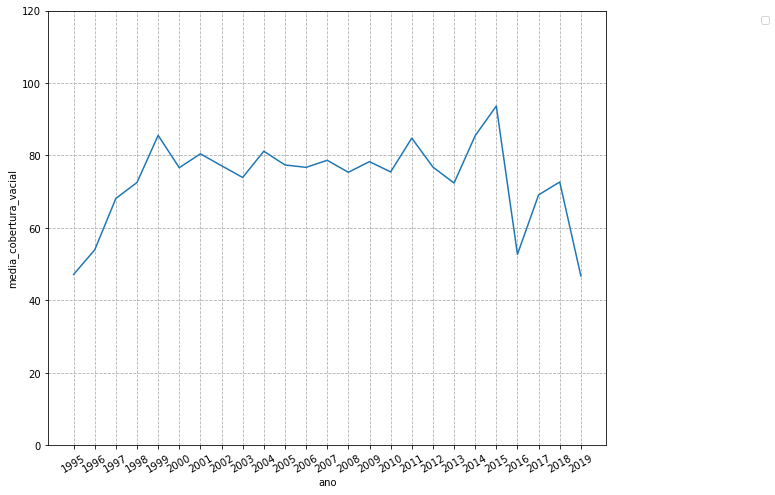

In [22]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(data=media_cobertura, x="ano", y="media_cobertura_vacial")
ax.legend(bbox_to_anchor=(0.8, 0.5, 0.5, 0.5),)
plt.xticks(rotation=30)
plt.ylim(0, 120)
plt.grid(linestyle="--")
plt.show()

No handles with labels found to put in legend.


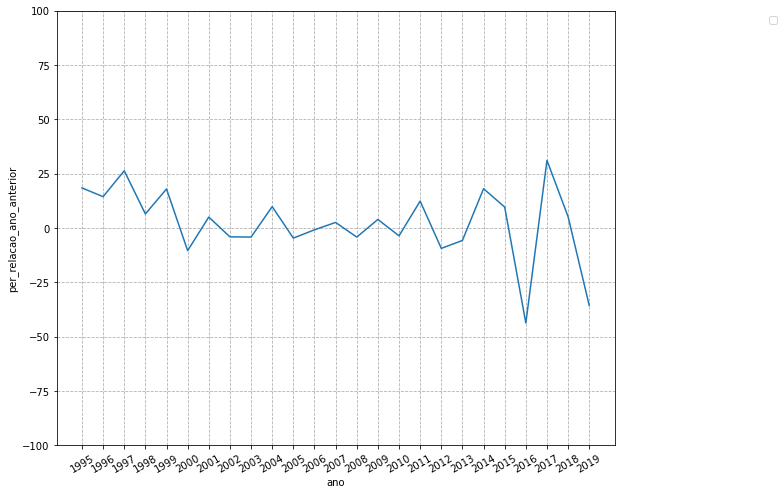

In [23]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(data=media_cobertura, x="ano", y="per_relacao_ano_anterior")
ax.legend(bbox_to_anchor=(0.8, 0.5, 0.5, 0.5),)
plt.xticks(rotation=30)
plt.ylim(-100, 100)
plt.grid(linestyle="--")
plt.show()

In [24]:
media_cobertura

,media_cobertura_vacial,media_cobertura_ano_anterior,per_relacao_ano_anterior
ano,,,
1995,47.170000,39.834667,18.414446
1996,53.954231,47.170000,14.382512
1997,68.150370,53.954231,26.311448
1998,72.541852,68.150370,6.443812
1999,85.548519,72.541852,17.929880
2000,76.618148,85.548519,-10.438954
2001,80.456296,76.618148,5.009450
2002,77.165185,80.456296,-4.090558
2003,73.927407,77.165185,-4.195905


No handles with labels found to put in legend.


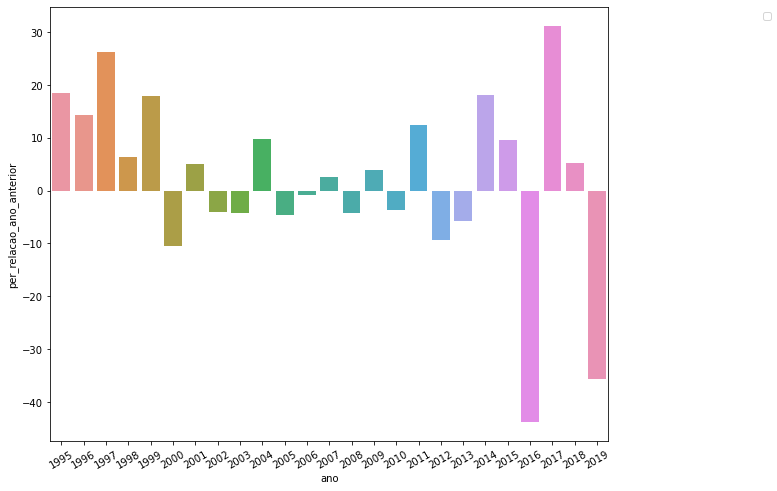

In [25]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data=media_cobertura, x=media_cobertura.index, y="per_relacao_ano_anterior")
ax.legend(bbox_to_anchor=(0.8, 0.5, 0.5, 0.5),)
plt.xticks(rotation=30)
plt.show()

In [26]:
## Porque a média de cobertura vacinal caiu muito a partir de 2016?

In [27]:
media_por_regiao = dados.groupby(['ano','Região']).mean()

In [28]:
media_por_regiao

cobertura_vacinal
ano  Região                         
1994 Centro-Oeste          27.065000
     Nordeste              42.771667
     Norte                 35.988000
     Sudeste               55.220000
     Sul                   51.600000
...                              ...
2019 Centro-Oeste          48.802500
     Nordeste              43.165556
     Norte                 47.718571
     Sudeste               43.580000
     Sul                   56.783333

[130 rows x 1 columns]

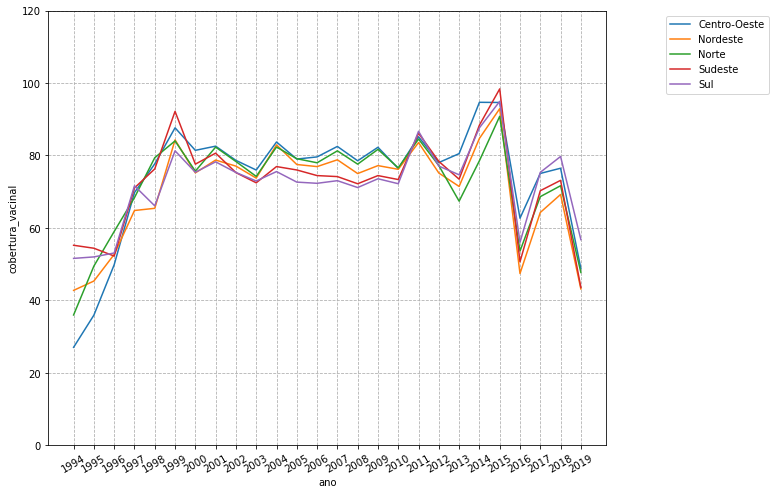

In [29]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(data=media_por_regiao, x="ano", y="cobertura_vacinal", hue="Região")
ax.legend(bbox_to_anchor=(0.8, 0.5, 0.5, 0.5),)
plt.xticks(rotation=30)
plt.ylim(0, 120)
plt.grid(linestyle="--")
plt.show()

### 4.3 Conclusões

## 5 Referências

## 6 Contatos

In [30]:
dateparse = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d')

vacinacao = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv",
                    encoding="ISO-8859-1", sep=",",
                    thousands=".", decimal=",", parse_dates=['date'], date_parser=dateparse)
vacinacao.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


In [31]:
vacinacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26031 entries, 0 to 26030
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   location                             26031 non-null  object        
 1   iso_code                             26031 non-null  object        
 2   date                                 26031 non-null  datetime64[ns]
 3   total_vaccinations                   15485 non-null  float64       
 4   people_vaccinated                    14703 non-null  float64       
 5   people_fully_vaccinated              11804 non-null  float64       
 6   daily_vaccinations_raw               13130 non-null  float64       
 7   daily_vaccinations                   25788 non-null  float64       
 8   total_vaccinations_per_hundred       15485 non-null  float64       
 9   people_vaccinated_per_hundred        14703 non-null  float64       
 10  people_ful

In [32]:
vacinacao['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Europe',
 

In [33]:
paises = ['England','United States','Israel','Brazil']

In [34]:
analise_paises = vacinacao[vacinacao['location'].isin(paises)]

In [35]:
analise_paises = analise_paises.set_index('date')

In [36]:
analise_paises.index

DatetimeIndex(['2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19',
               '2021-01-20', '2021-01-21', '2021-01-22', '2021-01-23',
               '2021-01-24', '2021-01-25',
               ...
               '2021-06-02', '2021-06-03', '2021-06-04', '2021-06-05',
               '2021-06-06', '2021-06-07', '2021-06-08', '2021-06-09',
               '2021-06-10', '2021-06-11'],
              dtype='datetime64[ns]', name='date', length=660, freq=None)

In [37]:
#analise_paises.index <= end_date

#analise_paises[analise_paises.index <= end_date]

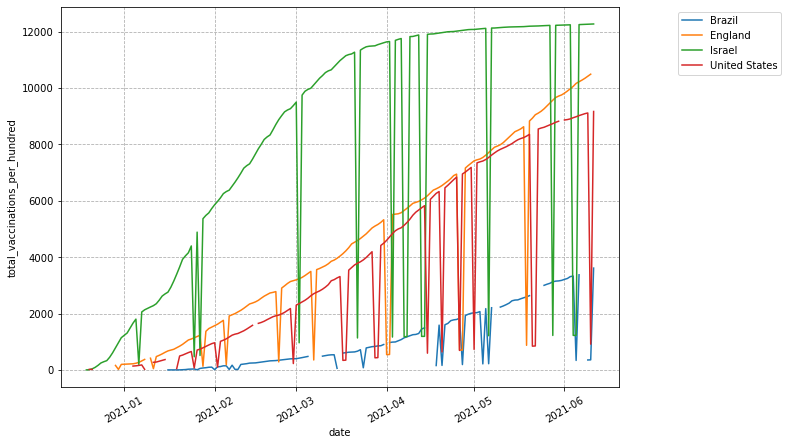

In [38]:
plt.figure(figsize=(10,7))
ax = sns.lineplot(data=analise_paises, x=analise_paises.index, y="total_vaccinations_per_hundred", hue="location")
ax.legend(bbox_to_anchor=(0.8, 0.5, 0.5, 0.5),)
plt.xticks(rotation=30)
#plt.ylim(0, 120)
plt.grid(linestyle="--")
plt.show()

In [39]:
start_date = '2021-01-15'
end_date = '2021-06-12'

In [40]:
mask = (analise_paises.index > start_date) & (analise_paises.index <= end_date)

In [41]:
analise_paises['total_vaccinations_per_hundred'].loc[(analise_paises.index > start_date) & (analise_paises.index <= end_date) & (analise_paises.location == 'Israel') & (analise_paises['total_vaccinations_per_hundred'] < analise_paises['total_vaccinations_per_hundred'].rolling(window=3).mean())] = analise_paises[(analise_paises.location == 'Israel') & (analise_paises['total_vaccinations_per_hundred'] < analise_paises['total_vaccinations_per_hundred'].mean())]['total_vaccinations_per_hundred'].apply(lambda x: np.nan)
analise_paises['total_vaccinations_per_hundred'].loc[(analise_paises.index > start_date) & (analise_paises.index <= end_date) & (analise_paises.location == 'England') & (analise_paises['total_vaccinations_per_hundred'] < analise_paises['total_vaccinations_per_hundred'].rolling(window=3).mean())] = analise_paises[(analise_paises.location == 'England') & (analise_paises['total_vaccinations_per_hundred'] < analise_paises['total_vaccinations_per_hundred'].mean())]['total_vaccinations_per_hundred'].apply(lambda x: np.nan)
analise_paises['total_vaccinations_per_hundred'].loc[(analise_paises.index > start_date) & (analise_paises.index <= end_date) & (analise_paises.location == 'Brazil') & (analise_paises['total_vaccinations_per_hundred'] < analise_paises['total_vaccinations_per_hundred'].rolling(window=3).mean())] = analise_paises[(analise_paises.location == 'Brazil') & (analise_paises['total_vaccinations_per_hundred'] < analise_paises['total_vaccinations_per_hundred'].mean())]['total_vaccinations_per_hundred'].apply(lambda x: np.nan)
analise_paises['total_vaccinations_per_hundred'].loc[(analise_paises.index > start_date) & (analise_paises.index <= end_date) & (analise_paises.location == 'United States') & (analise_paises['total_vaccinations_per_hundred'] < analise_paises['total_vaccinations_per_hundred'].rolling(window=3).mean())] = analise_paises[(analise_paises.location == 'United States') & (analise_paises['total_vaccinations_per_hundred'] < analise_paises['total_vaccinations_per_hundred'].mean())]['total_vaccinations_per_hundred'].apply(lambda x: np.nan)

C:\Users\u10322\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\u10322\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\u10322\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [42]:
analise_paises.head()

,location,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
date,,,,,,,,,,,
2021-01-16,Brazil,BRA,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2021-01-17,Brazil,BRA,112.0,112.0,NaN,112.0,112.0,0.0,0.0,NaN,1.0
2021-01-18,Brazil,BRA,1109.0,1109.0,NaN,997.0,554.0,0.0,0.0,NaN,3.0
2021-01-19,Brazil,BRA,11470.0,11470.0,NaN,10361.0,3823.0,1.0,1.0,NaN,18.0
2021-01-20,Brazil,BRA,28543.0,28543.0,NaN,17073.0,7136.0,1.0,1.0,NaN,34.0


In [43]:
analise_paises['total_vaccinations_per_hundred'] = analise_paises['total_vaccinations_per_hundred'].fillna(method='ffill')

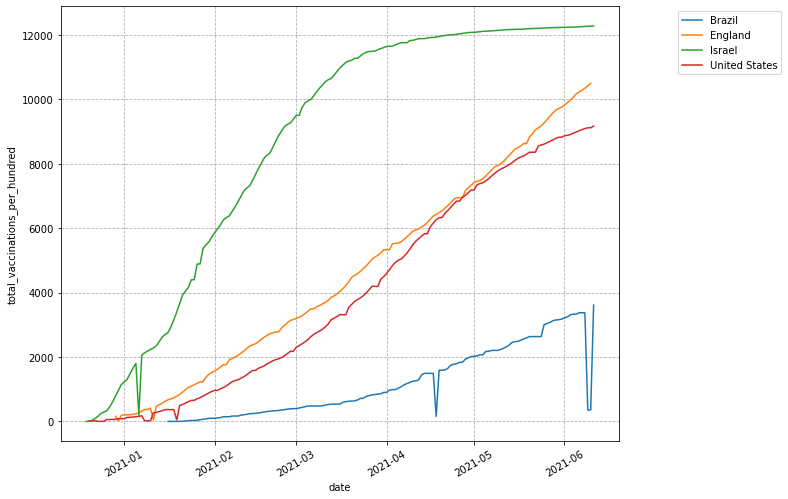

In [44]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(data=analise_paises, x=analise_paises.index, y="total_vaccinations_per_hundred", hue="location")
ax.legend(bbox_to_anchor=(0.8, 0.5, 0.5, 0.5),)
plt.xticks(rotation=30)
#plt.ylim(0, 120)
plt.grid(linestyle="--")
plt.show()

In [45]:
vacinacao_idade = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-age-group.csv',
                    encoding="ISO-8859-1", sep=",",
                    thousands=".", decimal=",", parse_dates=['date'], date_parser=dateparse)

vacinacao_idade.head()

,location,date,age_group,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
0,Austria,2021-01-08,18-24,16,0
1,Austria,2021-01-08,25-49,39,0
2,Austria,2021-01-08,50-59,54,0
3,Austria,2021-01-08,60-69,27,0
4,Austria,2021-01-08,70-79,28,0


In [46]:
vacinacao_idade['location'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Jersey', 'Lithuania', 'Luxembourg', 'Malta',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Slovenia', 'Spain',
       'Sweden', 'Uruguay'], dtype=object)

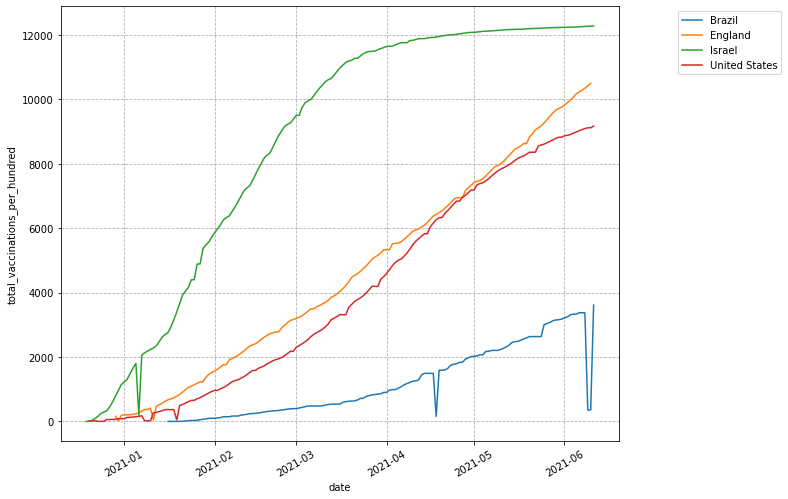

In [47]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(data=analise_paises, x=analise_paises.index, y="total_vaccinations_per_hundred", hue="location")
ax.legend(bbox_to_anchor=(0.8, 0.5, 0.5, 0.5),)
plt.xticks(rotation=30)
#plt.ylim(0, 120)
plt.grid(linestyle="--")
plt.show()

In [48]:
mortes_covid = pd.read_csv('https://raw.githubusercontent.com/capyvara/brazil-civil-registry-data/master/civil_registry_covid_cities_detailed.csv',
                    encoding="ISO-8859-1", sep=",",
                    thousands=".", decimal=",", parse_dates=['date'], date_parser=dateparse)

mortes_covid.head()

,date,state,state_ibge_code,city,city_ibge_code,place,gender,age_group,deaths_sars,deaths_pneumonia,...,deaths_others,deaths_covid19,deaths_stroke,deaths_stroke_covid19,deaths_cardiopathy,deaths_cardiogenic_shock,deaths_heart_attack,deaths_heart_attack_covid19,deaths_sudden_cardiac,created_at
0,2019-01-01,AC,12,Rio Branco,1200401,hospital,F,80-89,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2021-04-03 11:56:00
1,2019-01-01,AC,12,Rio Branco,1200401,hospital,M,30-39,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 15:33:00
2,2019-01-01,AC,12,Rio Branco,1200401,hospital,M,50-59,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 15:33:00
3,2019-01-01,AC,12,Rio Branco,1200401,hospital,M,80-89,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 15:33:00
4,2019-01-01,AC,12,Rio Branco,1200401,hospital,M,9-,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 15:33:00


In [50]:
mortes_covid['age_group'].unique()

array(['80-89', '30-39', '50-59', '9-', '90-99', '10-19', nan, '60-69',
       '40-49', '70-79', '20-29', '100+'], dtype=object)

In [51]:
def definir_faixa(faixa):
    
    if (faixa == '9-'):
        faixa = '0-29'
    elif (faixa == '10-19'):
        faixa = '0-29'
    elif (faixa == '20-29'):
        faixa = '0-29'
    elif (faixa == '80-89'):
        faixa = '80+'
    elif (faixa == '90-99'):
        faixa = '80+'
    elif (faixa == '100+'):
        faixa = '80+'    
    else: faixa
    
    return faixa

In [52]:
mortes_covid['age_group'] = mortes_covid['age_group'].apply(definir_faixa)

In [53]:
mortes_covid['age_group'].unique()

array(['80+', '30-39', '50-59', '0-29', nan, '60-69', '40-49', '70-79'],
      dtype=object)

In [54]:
mortes_covid = mortes_covid.groupby(['age_group','date']).sum()

In [55]:
mortes_covid = mortes_covid[['deaths_covid19']]

In [56]:
mortes_covid = mortes_covid[mortes_covid > 0]
mortes_covid = mortes_covid.dropna()
mortes_covid.head()

deaths_covid19
age_group date                      
0-29      2020-03-25             1.0
          2020-03-26             2.0
          2020-03-27             2.0
          2020-03-28             2.0
          2020-03-30             1.0

In [57]:
mortes_covid = mortes_covid.rolling(window=7).mean()

In [58]:
start_date = '2021-03-01'
end_date = '2021-05-01'

In [59]:
mortes_covid = mortes_covid.reset_index()

In [60]:
mortes_covid = mortes_covid.set_index('date')

In [73]:
start_date = '2021-01-01'
end_date = '2021-06-01'

In [74]:
mask = (mortes_covid.index > start_date) & (mortes_covid.index <= end_date)

In [75]:
mortes_covid = mortes_covid[mask]

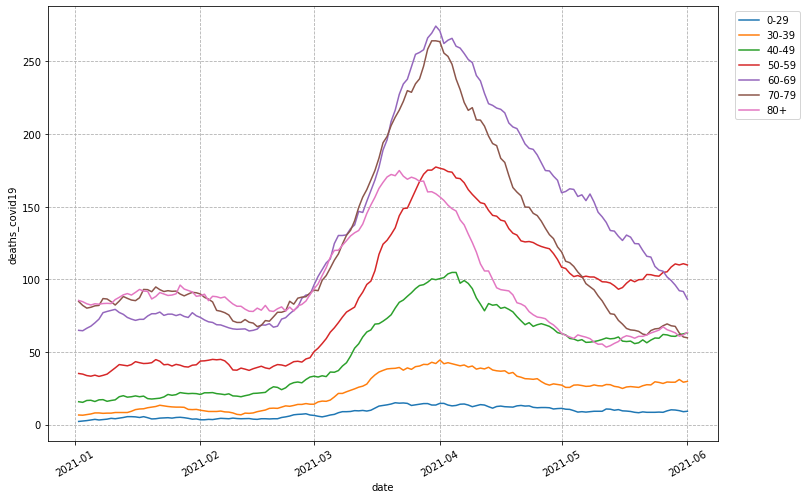

In [76]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=mortes_covid, x='date', y="deaths_covid19", hue="age_group")
ax.legend(bbox_to_anchor=(0.63, 0.5, 0.5, 0.5),)
plt.xticks(rotation=30)
#plt.ylim(0, 120)
plt.grid(linestyle="--")
plt.show()